<a href="https://colab.research.google.com/github/cagedlion/cagedlion/blob/main/MyPortfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Description : This program attempts to optimise an users poortfolio using the efficient frontier

In [2]:
# import the python libraries
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
# get the sstock symbols/tickers in the portfolio
assets = ['ASHOKLEY.NS','BAJAJCON.NS','BAJFINANCE.NS','BEL.NS','BHARTIARTL.NS','BHEL.NS','COLPAL.NS','FORTIS.NS','GAIL.NS','HAVELLS.NS','HDFCBANK.NS','HEIDELBERG.NS','ICICIBANK.NS','IDFC.NS','IDFCFIRSTB.NS','IFCI.NS','IOC.NS','IRFC.NS','ITC.NS','LT.NS','NHPC.NS','ONGC.NS','RELIANCE.NS','SAIL.NS','SBIN.NS','TATACONSUM.NS','TATAELXSI.NS','TATASTEEL.NS','TCS.NS','TECHM.NS','TRIDENT.NS','USHAMART.NS','WIPRO.NS']

In [7]:
#assign weights to the stocks as held in your portfolio
weights=np.array([0.0047,0.012,0.075,0.0130,0.096,0.00269,0.0035,0.00654,0.00974,0.01605,0.0262,0.0186,0.0313,0.00341,0.0115,0.00425,0.0105,0.0774,0.06508,0.184,0.0197,0.0143,0.04439,0.01269,0.0531,0.01267,0.0224,0.00819,0.01004,0.0102,0.0471,0.02577,0.0447])

In [11]:
# get the stock/portfolio starting date (taking last 6 years)
stockStartDate='2015-01-01'

In [12]:
# get the stock/portfolio ending date (today)
today=datetime.today().strftime('%Y-%m-%d')
today

'2021-04-22'

In [13]:
# create a dataframe to store the adjusted close price of the stocks
df=pd.DataFrame()
# store adjusted close price of the stocks into the df
for stock in assets:
  df[stock]=web.DataReader(stock,data_source='yahoo',start=stockStartDate,end=today)['Adj Close']

In [14]:
# show the df
df

,ASHOKLEY.NS,BAJAJCON.NS,BAJFINANCE.NS,BEL.NS,BHARTIARTL.NS,BHEL.NS,COLPAL.NS,FORTIS.NS,GAIL.NS,HAVELLS.NS,HDFCBANK.NS,HEIDELBERG.NS,ICICIBANK.NS,IDFC.NS,IDFCFIRSTB.NS,IFCI.NS,IOC.NS,IRFC.NS,ITC.NS,LT.NS,NHPC.NS,ONGC.NS,RELIANCE.NS,SAIL.NS,SBIN.NS,TATACONSUM.NS,TATAELXSI.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TRIDENT.NS,USHAMART.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01,44.344593,317.895721,344.624237,77.777077,321.128052,161.934052,808.649963,112.250000,103.157005,258.466217,458.701355,75.608131,299.907104,66.854706,NaN,35.171036,57.890511,NaN,210.285202,893.977722,12.732183,177.494690,420.596039,77.971588,303.322327,137.734131,275.276215,335.681000,1122.807739,568.704834,2.130946,27.600000,197.326309
2015-01-02,45.538490,340.269531,339.114716,77.388092,323.030518,166.004272,825.688904,111.550003,103.623146,257.343689,465.085205,76.199173,308.419952,67.278374,NaN,35.450172,57.572208,NaN,210.943878,912.833252,12.833233,180.151550,419.482819,78.065804,304.529816,139.379272,276.393311,340.909821,1137.760498,571.488525,2.168259,27.650000,199.076660
2015-01-05,49.290722,340.697327,338.228455,75.926147,315.862946,164.858551,818.636108,110.449997,103.949425,259.869415,461.158539,75.244400,309.058350,68.168076,NaN,35.403652,58.191620,NaN,211.774353,925.532715,12.732183,182.189362,414.888000,77.924469,302.114807,139.790543,281.385864,345.848145,1120.470093,561.953674,2.147529,29.799999,199.433868
2015-01-06,48.224751,329.317871,337.352051,74.921951,313.385193,157.351273,824.009521,106.949997,100.663139,245.697281,453.979614,71.925461,295.948639,66.092102,NaN,33.542747,57.546391,NaN,206.333237,894.661743,12.462720,171.871368,396.058502,74.108337,289.701782,135.403503,283.027252,329.082703,1079.162354,555.925781,2.072904,28.799999,194.772217
2015-01-07,50.868370,347.627625,344.220490,85.018013,314.137329,153.070038,839.324280,105.599998,98.099380,249.064896,455.304626,70.970703,287.946564,65.435417,NaN,33.356659,57.649616,NaN,202.495789,892.520447,12.294304,174.399292,404.679810,73.307426,289.943268,135.677719,296.705597,322.774994,1066.415039,553.328430,2.052176,27.150000,193.289749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-15,112.000000,294.600006,4660.299805,128.500000,539.349976,46.049999,1555.449951,205.899994,140.600006,1010.200012,1430.099976,230.949997,575.200012,47.200001,52.450001,11.300000,90.099998,21.10,206.699997,1374.650024,23.950001,105.099998,1944.300049,92.800003,342.700012,659.299988,2927.850098,898.200012,3218.949951,993.150024,13.950000,38.549999,430.700012
2021-04-16,113.650002,306.200012,4616.600098,128.000000,540.750000,46.200001,1570.849976,203.649994,139.600006,1010.450012,1428.650024,234.850006,566.950012,46.900002,53.650002,11.300000,90.150002,21.75,207.949997,1359.150024,24.049999,107.300003,1932.099976,91.599998,339.899994,671.299988,2963.800049,890.250000,3195.149902,1010.299988,14.000000,38.799999,469.200012
2021-04-19,109.900002,312.149994,4479.600098,123.400002,526.450012,44.049999,1536.000000,200.399994,136.399994,1000.950012,1412.400024,227.800003,559.750000,44.750000,50.700001,10.750000,88.099998,21.15,205.600006,1310.449951,23.549999,103.050003,1901.699951,89.150002,331.149994,664.099976,3049.600098,888.049988,3161.800049,1000.099976,13.450000,36.799999,472.750000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1552 entries, 2015-01-01 to 2021-04-22
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ASHOKLEY.NS    1552 non-null   float64
 1   BAJAJCON.NS    1552 non-null   float64
 2   BAJFINANCE.NS  1552 non-null   float64
 3   BEL.NS         1552 non-null   float64
 4   BHARTIARTL.NS  1552 non-null   float64
 5   BHEL.NS        1552 non-null   float64
 6   COLPAL.NS      1552 non-null   float64
 7   FORTIS.NS      1552 non-null   float64
 8   GAIL.NS        1552 non-null   float64
 9   HAVELLS.NS     1552 non-null   float64
 10  HDFCBANK.NS    1552 non-null   float64
 11  HEIDELBERG.NS  1552 non-null   float64
 12  ICICIBANK.NS   1552 non-null   float64
 13  IDFC.NS        1552 non-null   float64
 14  IDFCFIRSTB.NS  1342 non-null   float64
 15  IFCI.NS        1552 non-null   float64
 16  IOC.NS         1552 non-null   float64
 17  IRFC.NS        55 non-null     flo

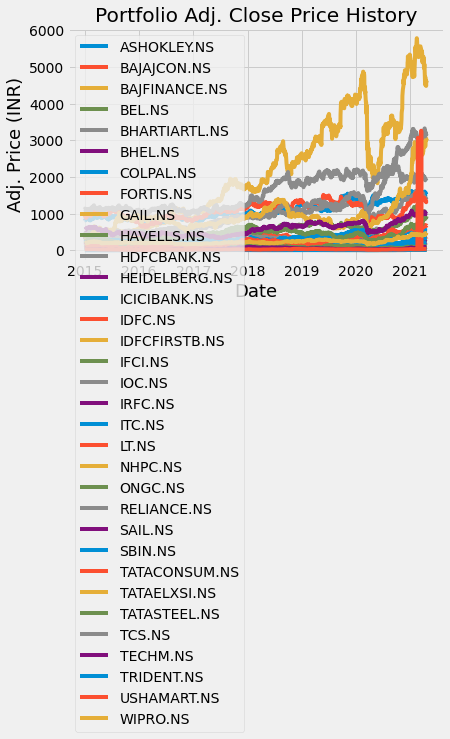

<Figure size 2160x1080 with 0 Axes>

In [16]:
#visually show the stock/portfolio
title = 'Portfolio Adj. Close Price History'
# get the stocks
my_stocks=df
# create and plot the graph
for c in my_stocks.columns.values:
  plt.plot(my_stocks[c],label=c)
plt.title(title)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj. Price (INR)', fontsize=18)
plt.legend(my_stocks.columns.values, loc='upper left')
plt.figure(figsize=(30, 15))
plt.show()

In [17]:
# show the daily simple return
returns=df.pct_change()
returns

,ASHOKLEY.NS,BAJAJCON.NS,BAJFINANCE.NS,BEL.NS,BHARTIARTL.NS,BHEL.NS,COLPAL.NS,FORTIS.NS,GAIL.NS,HAVELLS.NS,HDFCBANK.NS,HEIDELBERG.NS,ICICIBANK.NS,IDFC.NS,IDFCFIRSTB.NS,IFCI.NS,IOC.NS,IRFC.NS,ITC.NS,LT.NS,NHPC.NS,ONGC.NS,RELIANCE.NS,SAIL.NS,SBIN.NS,TATACONSUM.NS,TATAELXSI.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TRIDENT.NS,USHAMART.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,0.026923,0.070381,-0.015987,-0.005001,0.005924,0.025135,0.021071,-0.006236,0.004519,-0.004343,0.013917,0.007817,0.028385,0.006337,NaN,0.007937,-0.005498,NaN,0.003132,0.021092,0.007937,0.014969,-0.002647,0.001208,0.003981,0.011944,0.004058,0.015577,0.013317,0.004895,0.017510,0.001812,0.008870
2015-01-05,0.082397,0.001257,-0.002613,-0.018891,-0.022189,-0.006902,-0.008542,-0.009861,0.003149,0.009815,-0.008443,-0.012530,0.002070,0.013224,NaN,-0.001312,0.010759,NaN,0.003937,0.013912,-0.007874,0.011312,-0.010954,-0.001810,-0.007930,0.002951,0.018063,0.014486,-0.015197,-0.016684,-0.009560,0.077758,0.001794
2015-01-06,-0.021626,-0.033400,-0.002591,-0.013226,-0.007844,-0.045538,0.006564,-0.031689,-0.031614,-0.054536,-0.015567,-0.044109,-0.042418,-0.030454,NaN,-0.052563,-0.011088,NaN,-0.025693,-0.033355,-0.021164,-0.056633,-0.045385,-0.048972,-0.041087,-0.031383,0.005833,-0.048476,-0.036866,-0.010727,-0.034749,-0.033557,-0.023374
2015-01-07,0.054819,0.055599,0.020360,0.134754,0.002400,-0.027208,0.018586,-0.012623,-0.025469,0.013706,0.002919,-0.013274,-0.027039,-0.009936,NaN,-0.005548,0.001794,NaN,-0.018598,-0.002393,-0.013514,0.014708,0.021768,-0.010807,0.000834,0.002025,0.048329,-0.019168,-0.011812,-0.004672,-0.010000,-0.057292,-0.007611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-15,-0.028621,0.031152,-0.014475,0.023089,0.005968,-0.010741,0.010262,0.024888,0.012239,-0.013236,0.021245,-0.006667,0.026044,-0.019730,-0.029602,0.046296,0.014640,-0.016317,-0.009583,0.000692,0.008421,0.029887,0.006471,0.023153,0.004985,-0.007004,0.035619,0.021843,0.037016,-0.008684,0.018248,-0.005161,0.028046
2021-04-16,0.014732,0.039375,-0.009377,-0.003891,0.002596,0.003257,0.009901,-0.010928,-0.007112,0.000247,-0.001014,0.016887,-0.014343,-0.006356,0.022879,0.000000,0.000555,0.030806,0.006047,-0.011276,0.004175,0.020932,-0.006275,-0.012931,-0.008170,0.018201,0.012279,-0.008851,-0.007394,0.017268,0.003584,0.006485,0.089389
2021-04-19,-0.032996,0.019432,-0.029676,-0.035937,-0.026445,-0.046537,-0.022185,-0.015959,-0.022923,-0.009402,-0.011374,-0.030019,-0.012700,-0.045842,-0.054986,-0.048673,-0.022740,-0.027586,-0.011301,-0.035831,-0.020790,-0.039609,-0.015734,-0.026747,-0.025743,-0.010725,0.028949,-0.002471,-0.010438,-0.010096,-0.039286,-0.051546,0.007566


In [18]:
#create and show the annualised covariance matrix
cov_matrix_annual=returns.cov()*252
cov_matrix_annual

,ASHOKLEY.NS,BAJAJCON.NS,BAJFINANCE.NS,BEL.NS,BHARTIARTL.NS,BHEL.NS,COLPAL.NS,FORTIS.NS,GAIL.NS,HAVELLS.NS,HDFCBANK.NS,HEIDELBERG.NS,ICICIBANK.NS,IDFC.NS,IDFCFIRSTB.NS,IFCI.NS,IOC.NS,IRFC.NS,ITC.NS,LT.NS,NHPC.NS,ONGC.NS,RELIANCE.NS,SAIL.NS,SBIN.NS,TATACONSUM.NS,TATAELXSI.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TRIDENT.NS,USHAMART.NS,WIPRO.NS
ASHOKLEY.NS,0.192273,0.034299,0.071815,0.066728,0.036033,0.073094,0.021359,0.033665,0.036470,0.052087,0.036436,0.053558,0.063730,0.072386,0.080916,0.065892,0.043345,0.051520,0.025221,0.059692,0.034865,0.047242,0.038216,0.079907,0.067036,0.056391,0.065619,0.065395,0.015036,0.025588,0.069750,-0.935196,0.021264
BAJAJCON.NS,0.034299,0.121037,0.029184,0.021900,0.013761,0.029465,0.012489,0.020123,0.019780,0.018082,0.017881,0.025276,0.025421,0.030237,0.031574,0.030048,0.021816,0.028130,0.017768,0.023661,0.016563,0.023622,0.015996,0.035070,0.025606,0.023149,0.028338,0.026191,0.013709,0.018708,0.031734,-1.300070,0.014754
BAJFINANCE.NS,0.071815,0.029184,0.161770,0.053003,0.034713,0.060432,0.024591,0.027644,0.036969,0.048561,0.045258,0.054812,0.065127,0.061104,0.077034,0.055628,0.038915,0.056978,0.026459,0.048644,0.031103,0.038915,0.040866,0.066844,0.061716,0.054351,0.049163,0.056804,0.017627,0.028097,0.049876,-0.644358,0.017641
BEL.NS,0.066728,0.021900,0.053003,0.151179,0.028870,0.072198,0.020083,0.036137,0.039355,0.036164,0.026839,0.043085,0.048863,0.054136,0.062029,0.068864,0.039493,0.057495,0.027549,0.046413,0.036525,0.050993,0.036479,0.069437,0.054257,0.047313,0.053349,0.052480,0.014971,0.024359,0.059863,-1.026165,0.015188
BHARTIARTL.NS,0.036033,0.013761,0.034713,0.028870,0.113416,0.030884,0.012284,0.018237,0.023687,0.022782,0.022675,0.021439,0.034565,0.026417,0.034035,0.029063,0.018897,0.008287,0.020810,0.028482,0.015826,0.025297,0.027382,0.046109,0.035811,0.029630,0.019743,0.037777,0.013139,0.016471,0.029277,-0.489041,0.011774
BHEL.NS,0.073094,0.029465,0.060432,0.072198,0.030884,0.192068,0.023416,0.033946,0.051935,0.039809,0.032945,0.052413,0.059354,0.070968,0.079090,0.079744,0.047018,0.087089,0.034378,0.058951,0.040651,0.059583,0.037692,0.100324,0.073453,0.050432,0.053341,0.071535,0.016399,0.027951,0.065378,-1.380534,0.018147
COLPAL.NS,0.021359,0.012489,0.024591,0.020083,0.012284,0.023416,0.050509,0.013385,0.013115,0.016063,0.012850,0.018334,0.015713,0.020986,0.020749,0.020192,0.015278,0.007252,0.013912,0.016956,0.013591,0.015006,0.016127,0.022456,0.016071,0.022341,0.024121,0.021165,0.007825,0.013738,0.021732,-0.270518,0.012552
FORTIS.NS,0.033665,0.020123,0.027644,0.036137,0.018237,0.033946,0.013385,0.159949,0.025663,0.027605,0.018767,0.026604,0.030986,0.032463,0.022900,0.046750,0.022903,0.013082,0.015285,0.027752,0.025169,0.028875,0.025124,0.045313,0.030317,0.037679,0.039210,0.037076,0.015685,0.024761,0.042757,-0.732439,0.014281
GAIL.NS,0.036470,0.019780,0.036969,0.039355,0.023687,0.051935,0.013115,0.025663,0.114839,0.027040,0.019683,0.031248,0.041125,0.037566,0.044696,0.048420,0.043819,0.039908,0.028325,0.035319,0.027927,0.057663,0.032952,0.057163,0.046879,0.035135,0.029887,0.051114,0.014555,0.023597,0.042287,-0.804840,0.019029
HAVELLS.NS,0.052087,0.018082,0.048561,0.036164,0.022782,0.039809,0.016063,0.027605,0.027040,0.102227,0.024411,0.032038,0.038886,0.034220,0.045921,0.044622,0.027704,0.033608,0.020768,0.031298,0.023847,0.030652,0.025964,0.045791,0.039868,0.036526,0.038862,0.045921,0.012322,0.020654,0.045334,-0.537488,0.015265


In [19]:
#calculate the portfolio variance
port_variance=np.dot(weights.T,np.dot(cov_matrix_annual,weights))
port_variance

2.0530995188768206

In [20]:
#calculate the portfolio volatility aka SD
port_volatility=np.sqrt(port_variance)
port_volatility

1.4328640964434907

In [21]:
#calculate the portfolio annual return
portfolioSimpleAnnualReturn=np.sum(returns.mean()*weights)*252
portfolioSimpleAnnualReturn

0.9532465410074147

In [22]:
# show the expected annual return, volatility (risk) and variance
percent_var=str(round(port_variance,2)*100)+'%'
percent_vols=str(round(port_volatility,2)*100)+'%'
percent_ret=str(round(portfolioSimpleAnnualReturn,2)*100)+'%'
print('Expected Annual Return:' + percent_ret)
print('Annual Volatility/Risk:' + percent_vols)
print('Annual Variance:' + percent_var)

Expected Annual Return:95.0%
Annual Volatility/Risk:143.0%
Annual Variance:204.99999999999997%


In [23]:
pip install PyPortfolioOpt

     |████████████████████████████████| 61kB 5.2MB/s 
     |████████████████████████████████| 1.3MB 11.4MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for cvxpy: filename=cvxpy-1.1.12-cp37-cp37m-linux_x86_64.whl size=2731668 sha256=5d0e8c61d4e1805518c1d908518b0e224ecdef2969da8686eaf78514dcb8348f
  Stored in directory: /root/.cache/pip/wheels/9b/62/55/1da181c05c710c5d99bd560edebec3bd6a61cb69acef9dc00e
Successfully built cvxpy
  Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


In [24]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [25]:
# Portfolio Optimisation

# calculate the expected returns and and the annualised sample covariance matrix of asset returns
mu=expected_returns.mean_historical_return(df)
S=risk_models.sample_cov(df)

# optimise for max sharpe ratio
ef=EfficientFrontier(mu,S)
weights=ef.max_sharpe()
cleaned_weights=ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('ASHOKLEY.NS', 0.0), ('BAJAJCON.NS', 0.0), ('BAJFINANCE.NS', 0.36798), ('BEL.NS', 0.0), ('BHARTIARTL.NS', 0.0), ('BHEL.NS', 0.0), ('COLPAL.NS', 0.0), ('FORTIS.NS', 0.0), ('GAIL.NS', 0.0), ('HAVELLS.NS', 0.02591), ('HDFCBANK.NS', 0.0), ('HEIDELBERG.NS', 0.0), ('ICICIBANK.NS', 0.0), ('IDFC.NS', 0.0), ('IDFCFIRSTB.NS', 0.0), ('IFCI.NS', 0.0), ('IOC.NS', 0.0), ('IRFC.NS', 0.0), ('ITC.NS', 0.0), ('LT.NS', 0.0), ('NHPC.NS', 0.0), ('ONGC.NS', 0.0), ('RELIANCE.NS', 0.15546), ('SAIL.NS', 0.0), ('SBIN.NS', 0.0), ('TATACONSUM.NS', 0.00713), ('TATAELXSI.NS', 0.24029), ('TATASTEEL.NS', 0.0), ('TCS.NS', 0.1226), ('TECHM.NS', 0.0), ('TRIDENT.NS', 0.04693), ('USHAMART.NS', 0.00021), ('WIPRO.NS', 0.0335)])
Expected annual return: 40.2%
Annual volatility: 25.3%
Sharpe Ratio: 1.51


/usr/local/lib/python3.7/dist-packages/pypfopt/risk_models.py:69: UserWarning: The covariance matrix is non positive semidefinite. Amending eigenvalues.
  "The covariance matrix is non positive semidefinite. Amending eigenvalues."


(0.4021884444571943, 0.2533129116514198, 1.5087602205730368)

In [27]:
# get the discrete allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
# assuming INR 60000 is available today for investment, the optimum allocation can be found
latest_prices=get_latest_prices(df)
weights=cleaned_weights
da=DiscreteAllocation(weights, latest_prices, total_portfolio_value=60000)

allocation,leftover = da.lp_portfolio()
print('Discrete Allocation:', allocation)
print('Funds Remaining: INR{:.2f}'.format(leftover))


Discrete Allocation: {'BAJFINANCE.NS': 5, 'HAVELLS.NS': 1, 'RELIANCE.NS': 5, 'TATACONSUM.NS': 1, 'TATAELXSI.NS': 5, 'TCS.NS': 2, 'TRIDENT.NS': 193, 'WIPRO.NS': 4}
Funds Remaining: INR9.75
